<a href="https://colab.research.google.com/github/Kevontym/DataScience/blob/main/Web2Web_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Chem_Ship/chemical_shipments_dataset_10k.csv")
df.head()

,shipment_id,vendor,origin_region,destination_region,shipment_weight,chemical_type,scheduled_days,priority_level,actual_days,delay_flag,shipment_cost
0,SHP00000,Vendor_9,West,South,455.38,Oxidizer,12,High,15,1,5028.14
1,SHP00001,Vendor_15,West,South,696.80,Explosive,8,Low,10,1,2623.64
2,SHP00002,Vendor_12,West,North,548.12,Explosive,12,Low,10,0,3704.31
3,SHP00003,Vendor_19,West,Central,529.11,Oxidizer,6,Medium,9,1,1317.80
4,SHP00004,Vendor_17,North,North,309.49,Explosive,4,Low,8,1,4017.44


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shipment_id         10000 non-null  object 
 1   vendor              10000 non-null  object 
 2   origin_region       10000 non-null  object 
 3   destination_region  10000 non-null  object 
 4   shipment_weight     10000 non-null  float64
 5   chemical_type       10000 non-null  object 
 6   scheduled_days      10000 non-null  int64  
 7   priority_level      10000 non-null  object 
 8   actual_days         10000 non-null  int64  
 9   delay_flag          10000 non-null  int64  
 10  shipment_cost       10000 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


,shipment_id,vendor,origin_region,destination_region,shipment_weight,chemical_type,scheduled_days,priority_level,actual_days,delay_flag,shipment_cost
count,10000,10000,10000,10000,10000.000000,10000,10000.000000,10000,10000.00000,10000.000000,10000.000000
unique,10000,20,5,5,NaN,6,NaN,3,NaN,NaN,NaN
top,SHP09999,Vendor_4,South,West,NaN,Explosive,NaN,Medium,NaN,NaN,NaN
freq,1,554,2070,2069,NaN,1717,NaN,3433,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,498.265478,NaN,8.492400,NaN,9.52480,0.577300,3073.823565
std,NaN,NaN,NaN,NaN,150.072136,NaN,3.452178,NaN,3.98183,0.494013,1202.028016
min,NaN,NaN,NaN,NaN,-88.360000,NaN,3.000000,NaN,1.00000,0.000000,919.900000
25%,NaN,NaN,NaN,NaN,398.065000,NaN,6.000000,NaN,6.00000,0.000000,2046.412500
50%,NaN,NaN,NaN,NaN,498.365000,NaN,8.000000,NaN,10.00000,1.000000,3056.940000
75%,NaN,NaN,NaN,NaN,599.192500,NaN,11.000000,NaN,13.00000,1.000000,4088.680000


In [ ]:
df.isna().sum()

print("Unique chemical types:", df["chemical_type"].unique())
print("Priority levels:", df["priority_level"].unique())
print("Vendors:", df["vendor"].nunique())

Unique chemical types: ['Oxidizer' 'Explosive' 'Non-Hazardous' 'Flammable' 'Reactive' 'Corrosive']
Priority levels: ['High' 'Low' 'Medium']
Vendors: 20


In [ ]:
df_cleaned = df.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a clean copy to preserve your original
# Done correctly (from your block)
X_encoded = X.copy()
label_encoders = {}

for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns=["shipment_id", "delay_flag", "actual_days", "shipment_cost"])
X["shipment_weight"] += np.random.normal(0, 3, size=len(X))
y = df["delay_flag"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Identify numeric columns (usually floats or ints, not encoded categoricals)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns

# Fit only on train, transform both
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# Then fit on the full feature set
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.36      0.38       845
           1       0.56      0.61      0.59      1155

    accuracy                           0.50      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.50      0.50      0.50      2000

Confusion Matrix:
 [[302 543]
 [450 705]]
ROC-AUC Score: 0.4838930300468762


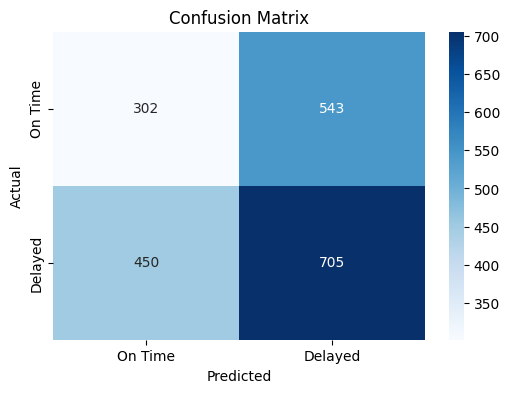

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["On Time", "Delayed"], yticklabels=["On Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

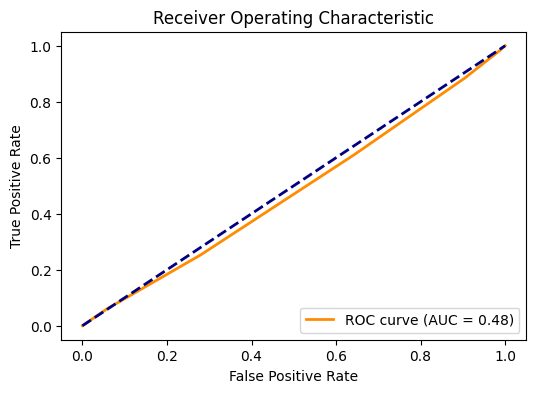

In [ ]:
from sklearn.metrics import roc_curve, auc

# Need probability estimates for ROC
y_probs = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier

def objective(trial):
    # Hyperparameters
    k = trial.suggest_int('n_neighbors', 3, 25)
    k_feat = trial.suggest_int('k_features', 3, len(num_cols))

    # Pipeline: Select top features → Scale → KNN
    pipeline = Pipeline([
        ('select', SelectKBest(score_func=f_classif, k=k_feat)),
        ('scale', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=k))
    ])

    # Cross-validate
    scores = cross_val_score(pipeline, X_train[num_cols], y_train, cv=5, scoring='roc_auc')
    return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-07-24 02:08:53,002] A new study created in memory with name: no-name-176781bc-ef2e-47ae-8d6f-7030e02162da
[I 2025-07-24 02:08:53,169] Trial 0 finished with value: 0.49708040052487146 and parameters: {'n_neighbors': 17, 'k_features': 4}. Best is trial 0 with value: 0.49708040052487146.
[I 2025-07-24 02:08:53,307] Trial 1 finished with value: 0.501090284045616 and parameters: {'n_neighbors': 16, 'k_features': 3}. Best is trial 1 with value: 0.501090284045616.
[I 2025-07-24 02:08:53,465] Trial 2 finished with value: 0.49708040052487146 and parameters: {'n_neighbors': 17, 'k_features': 4}. Best is trial 1 with value: 0.501090284045616.
[I 2025-07-24 02:08:53,721] Trial 3 finished with value: 0.496735178448524 and parameters: {'n_neighbors': 4, 'k_features': 7}. Best is trial 1 with value: 0.501090284045616.
[I 2025-07-24 02:08:54,009] Trial 4 finished with value: 0.49536343552724543 and parameters: {'n_neighbors': 18, 'k_features': 6}. Best is trial 1 with value: 0.501090284045616.

In [ ]:
print("Best trial:")
print(study.best_trial.params)

Best trial:
{'n_neighbors': 16, 'k_features': 5}


In [ ]:
import optuna.visualization as vis

vis.plot_optimization_history(study).show()
vis.plot_param_importances(study).show()

In [ ]:
from sklearn.feature_selection import SelectKBest

# Extract best params
best_k = study.best_trial.params['n_neighbors']
best_k_features = study.best_trial.params['k_features']

# Apply final model
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=best_k_features)),
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=best_k))
])

pipeline.fit(X_train[num_cols], y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test[num_cols])
y_probs = pipeline.predict_proba(X_test[num_cols])[:, 1]

In [ ]:
# Rebuild model using best trial from Optuna
best_trial = study.best_trial
best_k = best_trial.params['n_neighbors']
best_k_features = best_trial.params['k_features']

print(f"Best k_neighbors: {best_k}")
print(f"Best number of features: {best_k_features}")

Best k_neighbors: 16
Best number of features: 5


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Re-select top features using entire X_train
selector = SelectKBest(score_func=f_classif, k=best_k_features)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

# Optional: get actual feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['origin_region', 'shipment_weight', 'chemical_type', 'scheduled_days', 'priority_level']


In [ ]:
# Final KNN model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_best, y_train)

# Predict on test set
y_pred = final_knn.predict(X_test_best)
y_probs = final_knn.predict_proba(X_test_best)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.35      0.38       845
           1       0.58      0.65      0.61      1155

    accuracy                           0.53      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.51      0.53      0.52      2000

Confusion Matrix:
 [[295 550]
 [400 755]]
ROC-AUC Score: 0.4977294500371423


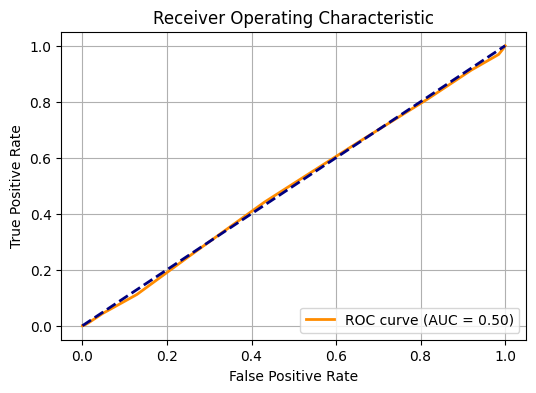

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

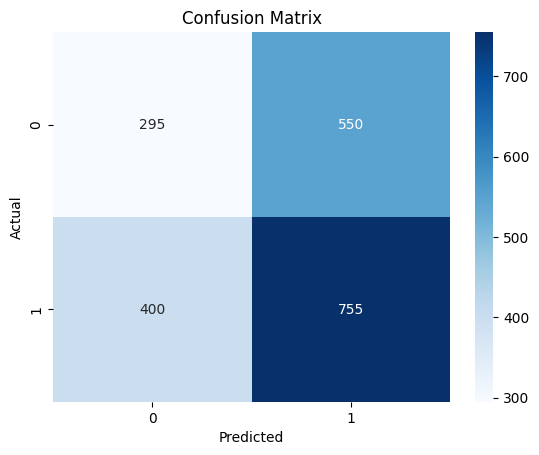

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install xgboost --quiet

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters (simple starter set)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 42
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict
y_probs = xgb_model.predict(dtest)
y_pred = (y_probs >= 0.5).astype(int)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.30      0.35       845
           1       0.57      0.68      0.62      1155

    accuracy                           0.52      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.50      0.52      0.50      2000

Confusion Matrix:
 [[257 588]
 [375 780]]
ROC-AUC Score: 0.49424626655395887


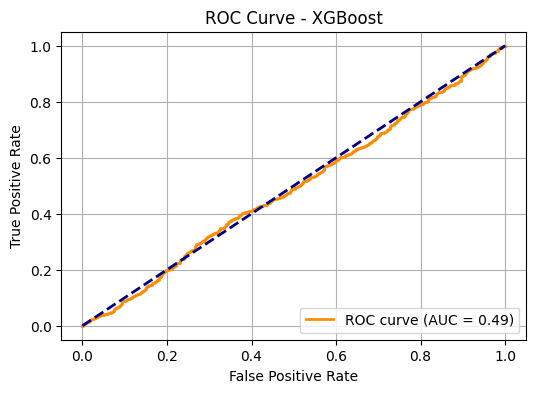

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

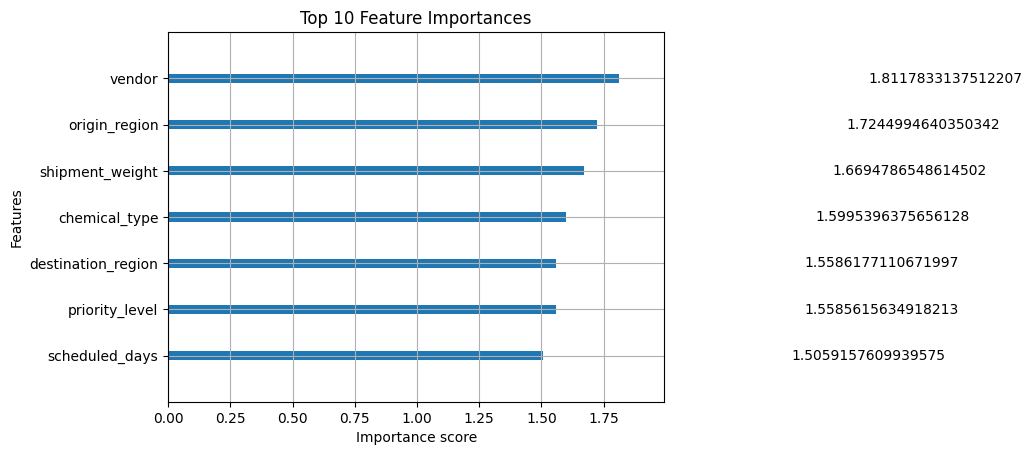

In [ ]:
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "use_label_encoder": False,
        "eval_metric": "auc"
    }

    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="roc_auc").mean()
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)  # 50 trials or 10 min

[I 2025-07-24 02:17:20,937] A new study created in memory with name: no-name-5641ba2a-34a4-413e-8f0b-ea19aa583610
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:17:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:17:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:17:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


[I 2025-07-24 02:17:21,033] Trial 0 finished with value: 0.4860468303536732 and parameters: {'n_estimators': 69, 'max_depth': 4, 'learning_rate': 0.22170593912579944, 'subsample': 0.6945614445501309, 'colsample_bytree': 0.8967166615039759, 'gamma': 3.919396339310852, 'reg_alpha': 0.8236134971520753, 'reg_lambda': 3.238290351727909}. Be

In [ ]:
print("Best AUC Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)

Best AUC Score: 0.5141142055430303
Best Hyperparameters: {'n_estimators': 103, 'max_depth': 4, 'learning_rate': 0.11701989226287005, 'subsample': 0.8543481586312748, 'colsample_bytree': 0.7001008423699023, 'gamma': 1.2148345113522387, 'reg_alpha': 0.5913516221514143, 'reg_lambda': 0.5797762573868707}


In [ ]:
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "use_label_encoder": False,
    "eval_metric": "auc"
})

xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_train, y_train)

# Predict
y_probs = xgb_tuned.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

# Eval
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.04      0.08       845
           1       0.58      0.96      0.72      1155

    accuracy                           0.57      2000
   macro avg       0.49      0.50      0.40      2000
weighted avg       0.51      0.57      0.45      2000

Confusion Matrix:
 [[  35  810]
 [  50 1105]]
ROC-AUC Score: 0.4977509669817362


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:19:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

In [ ]:
!pip install -q optuna xgboost
import xgboost as xgb
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
def objective(trial):
    # class ratio for scale_pos_weight  = (# negative / # positive)
    pos = y_train.sum()
    neg = len(y_train) - pos
    base_spw = neg / pos

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        # ← key GPU flags
        "tree_method": "gpu_hist",
        "predictor": "gpu_predictor",
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5*base_spw, 2*base_spw),
        "random_state": 42,
    }

    model = xgb.XGBClassifier(**params)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc").mean()
    return auc

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=20*60)  # 20 min cap

Streaming output truncated to the last 5000 lines.
[02:23:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:23:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:2676: UserWarning:

[02:24:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:24:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to

In [ ]:
best_params = study.best_params
best_params.update({
    "tree_method": "gpu_hist",
    "predictor": "gpu_predictor",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "random_state": 42
})

xgb_best = xgb.XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

y_probs = xgb_best.predict_proba(X_test)[:, 1]
y_pred  = (y_probs >= 0.5).astype(int)

print("AUC:", roc_auc_score(y_test, y_probs))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:25:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[02:25:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.




AUC: 0.4874996798073722

Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.59       845
           1       0.00      0.00      0.00      1155

    accuracy                           0.42      2000
   macro avg       0.21      0.50      0.30      2000
weighted avg       0.18      0.42      0.25      2000

Confusion Matrix:
 [[ 845    0]
 [1155    0]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:2676: UserWarning:

[02:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

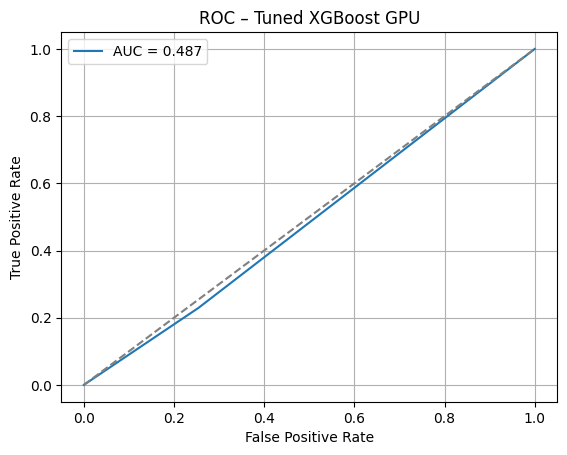

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr,tpr):.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC – Tuned XGBoost GPU"); plt.legend(); plt.grid(); plt.show()

count    10000.000000
mean         1.032400
std          1.997936
min         -2.000000
25%         -1.000000
50%          1.000000
75%          3.000000
max          4.000000
Name: delay_days, dtype: float64

% late: 0.5773

Late shipment quantiles:
0.25    2.0
0.50    3.0
0.75    4.0
0.90    4.0
0.95    4.0
Name: delay_days, dtype: float64


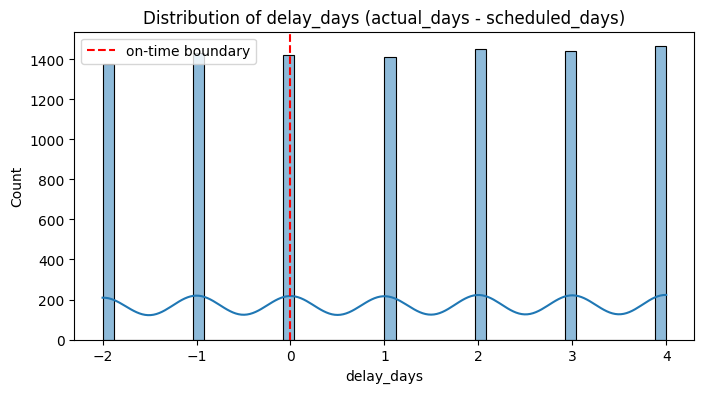

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your full 10k dataframe
df = df.copy()
df['delay_days'] = df['actual_days'] - df['scheduled_days']

print(df['delay_days'].describe())
print("\n% late:", (df['delay_days'] > 0).mean())

late = df.loc[df['delay_days'] > 0, 'delay_days']
print("\nLate shipment quantiles:")
print(late.quantile([0.25, 0.5, 0.75, 0.9, 0.95]))

plt.figure(figsize=(8,4))
sns.histplot(df['delay_days'], bins=50, kde=True)
plt.title("Distribution of delay_days (actual_days - scheduled_days)")
plt.axvline(0, color='red', linestyle='--', label='on-time boundary')
plt.legend()
plt.show()

In [ ]:
# Example: 0 = on-time/early, 1 = 1–6 days late, 2 = ≥7 days late
bins = [-np.inf, 0, 6, np.inf]
labels = [0, 1, 2]  # 0: on-time, 1: mild, 2: severe
df['delay_severity'] = pd.cut(df['delay_days'], bins=bins, labels=labels).astype(int)

df['delay_severity'].value_counts(normalize=True)

,proportion
delay_severity,
1,0.5773
0,0.4227


In [ ]:
from sklearn.model_selection import train_test_split

target_col = 'delay_severity'   # or 'delay_severity_q'
y = df[target_col]

# Drop columns that leak or are IDs
drop_cols = ['shipment_id', 'delay_flag', 'delay_days', 'actual_days']  # keep scheduled_days!
X = df.drop(columns=[c for c in drop_cols if c in df.columns] + [target_col])

# Encode categoricals (simple label encoding; CatBoost can take raw cats)
from sklearn.preprocessing import LabelEncoder
X_enc = X.copy()
for col in X_enc.select_dtypes(include='object').columns:
    X_enc[col] = LabelEncoder().fit_transform(X_enc[col])

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
!pip install -q optuna xgboost packaging

import optuna
import xgboost as xgb
from packaging import version
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

xgb_ver = version.parse(xgb.__version__)
use_xgb2 = xgb_ver >= version.parse("2.0.0")



print(type(y_train), y_train.shape, y_train.ndim)
print(type(y_test),  y_test.shape,  y_test.ndim)

# If either is a DataFrame or 2D array, flatten it:
import numpy as np
import pandas as pd

def to_1d(y):
    if isinstance(y, pd.DataFrame):
        # If it's one-hot, pick the argmax to get back to class ids
        if y.shape[1] > 1:
            return y.values.argmax(axis=1)
        return y.iloc[:, 0].values
    y = np.asarray(y)
    return y.ravel()

y_train = to_1d(y_train).astype(int)
y_test  = to_1d(y_test).astype(int)


# AFTER you flattened y_train / y_test
import numpy as np

num_class = np.unique(y_train).size
classes_sorted = np.sort(np.unique(y_train))

# DMatrix once, reuse inside trials
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test,  label=y_test)

def objective(trial):
    # Common params
    params = {
        "objective": "multi:softprob",
        "num_class": num_class,
        "eval_metric": "mlogloss",
        "eta": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),  # 'eta' in core API
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),    # alpha in core API
        "lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),  # lambda in core API
        "seed": 42,
    }

    # GPU settings depend on version
    if use_xgb2:
        params["tree_method"] = "hist"
        params["device"] = "cuda"
    else:
        params["tree_method"] = "gpu_hist"

    num_boost_round = trial.suggest_int("n_estimators", 400, 2000)

    bst = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dvalid, "valid")],
        early_stopping_rounds=100,
        verbose_eval=False,
    )

    probs = bst.predict(dvalid)  # shape: (n_samples, num_class)
    y_test_bin = label_binarize(y_test, classes=classes_sorted)

    auc_macro = roc_auc_score(y_test_bin, probs, average="macro", multi_class="ovr")
    return auc_macro

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, timeout=20*60)

print("Best AUC (macro):", study.best_value)
print("Best params:", study.best_params)

[I 2025-07-25 00:00:24,477] A new study created in memory with name: no-name-de6e527f-af71-4f17-a362-d643463b94fa


<class 'numpy.ndarray'> (8000,) 1
<class 'numpy.ndarray'> (2000,) 1


[W 2025-07-25 00:00:26,342] Trial 0 failed with parameters: {'learning_rate': 0.001400093178549935, 'max_depth': 6, 'min_child_weight': 2.3834947765948336, 'subsample': 0.691793596707603, 'colsample_bytree': 0.7547267833035782, 'gamma': 1.9032872882464797, 'reg_alpha': 2.8403558341366053, 'reg_lambda': 1.5344073582136635, 'n_estimators': 1034} because of the following error: ValueError('y should be a 1d array, got an array of shape (2000, 2) instead.').
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipython-input-13-133262109.py", line 83, in objective
    auc_macro = roc_auc_score(y_test_bin, probs, average="macro", multi_class="ovr")
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrap

ValueError: y should be a 1d array, got an array of shape (2000, 2) instead.

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from packaging import version
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def header(t):
    print("\n" + "="*len(t))
    print(t)
    print("="*len(t))

def to_1d(y):
    # Force labels into a 1-D int array
    if isinstance(y, pd.Series):
        return y.values.ravel().astype(int)
    if isinstance(y, pd.DataFrame):
        if y.shape[1] > 1:
            return y.values.argmax(axis=1).astype(int)  # was one-hot
        return y.iloc[:, 0].values.ravel().astype(int)
    return np.asarray(y).ravel().astype(int)

# ---------------------------
# 0) Print incoming shapes
# ---------------------------
header("0) Incoming shapes")
print("X_train:", getattr(X_train, "shape", None))
print("X_test :", getattr(X_test,  "shape", None))
print("y_train:", type(y_train), getattr(y_train, "shape", None), getattr(y_train, "ndim", None))
print("y_test :", type(y_test),  getattr(y_test,  "shape", None), getattr(y_test,  "ndim", None))

# ---------------------------
# 1) Force y to 1-D
# ---------------------------
header("1) Force y to 1-D")
y_train = to_1d(y_train)
y_test  = to_1d(y_test)
print("y_train ->", type(y_train), y_train.shape, y_train.ndim)
print("y_test  ->", type(y_test),  y_test.shape,  y_test.ndim)

# ---------------------------
# 2) Class info
# ---------------------------
header("2) Class info")
classes_sorted = np.sort(np.unique(y_train))
num_class = classes_sorted.size
print("classes_sorted:", classes_sorted)
print("num_class:", num_class)

# ---------------------------
# 3) Build DMatrices
# ---------------------------
header("3) DMatrix build")
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test,  label=y_test)
print("dtrain rows/cols:", dtrain.num_row(), dtrain.num_col())
print("dvalid rows/cols:", dvalid.num_row(), dvalid.num_col())

# ---------------------------
# 4) One quick train (no tuning) just to verify pipeline
# ---------------------------
header("4) Quick train/eval just to verify everything works")

xgb_ver = version.parse(xgb.__version__)
use_xgb2 = xgb_ver >= version.parse("2.0.0")

params = {
    "seed": 42,
}
if num_class == 2:
    params.update({
        "objective": "binary:logistic",
        "eval_metric": "auc",
    })
else:
    params.update({
        "objective": "multi:softprob",
        "num_class": num_class,
        "eval_metric": "mlogloss",
    })

# GPU flags
if use_xgb2:
    params["tree_method"] = "hist"
    params["device"] = "cuda"
else:
    params["tree_method"] = "gpu_hist"

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=20,
    verbose_eval=False
)

probs = bst.predict(dvalid)
print("probs shape:", probs.shape)

if num_class == 2:
    preds = (probs >= 0.5).astype(int)
    print("\nClassification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, probs))
else:
    preds = probs.argmax(axis=1)
    print("\nClassification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    y_test_bin = label_binarize(y_test, classes=classes_sorted)
    macro_auc = roc_auc_score(y_test_bin, probs, average="macro", multi_class="ovr")
    print("Macro ROC-AUC:", macro_auc)


0) Incoming shapes
X_train: (8000, 8)
X_test : (2000, 8)
y_train: <class 'numpy.ndarray'> (8000,) 1
y_test : <class 'numpy.ndarray'> (2000,) 1

1) Force y to 1-D
y_train -> <class 'numpy.ndarray'> (8000,) 1
y_test  -> <class 'numpy.ndarray'> (2000,) 1

2) Class info
classes_sorted: [0 1]
num_class: 2

3) DMatrix build
dtrain rows/cols: 8000 8
dvalid rows/cols: 2000 8

4) Quick train/eval just to verify everything works
probs shape: (2000,)

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.26      0.33       845
           1       0.59      0.77      0.66      1155

    accuracy                           0.55      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.53      0.55      0.52      2000

Confusion Matrix:
 [[219 626]
 [271 884]]
ROC-AUC: 0.520366812674505


In [ ]:
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos
scale_pos_weight

np.float64(0.7323516673884799)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1) Find object columns
obj_cols = X_train.select_dtypes(include='object').columns.tolist()
print("Object columns:", obj_cols)

# 2) Fit encoders on train+test to avoid unseen-category errors
encoders = {}
for col in obj_cols:
    le = LabelEncoder()
    combined = pd.concat([X_train[col], X_test[col]], axis=0).astype(str)
    le.fit(combined)
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col]  = le.transform(X_test[col].astype(str))
    encoders[col] = le

# 3) Make sure y is 1-D ints
y_train = np.asarray(y_train).ravel().astype(int)
y_test  = np.asarray(y_test).ravel().astype(int)

# 4) Rebuild DMatrices
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test,  label=y_test)

Object columns: ['vendor', 'origin_region', 'destination_region', 'chemical_type', 'priority_level', 'lane']


In [ ]:
!pip install -q optuna xgboost packaging

import optuna
import xgboost as xgb
from packaging import version
import numpy as np
from sklearn.metrics import roc_auc_score

xgb_ver = version.parse(xgb.__version__)
use_xgb2 = xgb_ver >= version.parse("2.0.0")

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test,  label=y_test)

def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "eta": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 15),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5*scale_pos_weight, 2.0*scale_pos_weight),
        "seed": 42,
    }

    if use_xgb2:
        params["tree_method"] = "hist"
        params["device"] = "cuda"
    else:
        params["tree_method"] = "gpu_hist"

    num_boost_round = trial.suggest_int("n_estimators", 400, 2000)

    cv = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        nfold=5,
        early_stopping_rounds=100,
        metrics="auc",
        seed=42,
        verbose_eval=False,
    )

    # Last row has the best score
    best_auc = cv["test-auc-mean"].max()
    return best_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=20*60)

print("Best CV AUC:", study.best_value)
print("Best params:", study.best_params)

[I 2025-07-25 00:48:32,290] A new study created in memory with name: no-name-e24e46f9-6f50-4a21-8f24-77f0f88ac32b
[I 2025-07-25 00:48:33,693] Trial 0 finished with value: 0.525409753637314 and parameters: {'learning_rate': 0.0332775983610292, 'max_depth': 8, 'min_child_weight': 4.374331418848973, 'subsample': 0.9138040901690516, 'colsample_bytree': 0.6525545233828812, 'gamma': 1.937064098531136, 'reg_alpha': 1.4465688602919484, 'reg_lambda': 2.9023067815582393, 'scale_pos_weight': 0.8659909890277353, 'n_estimators': 1928}. Best is trial 0 with value: 0.525409753637314.
[I 2025-07-25 00:48:34,607] Trial 1 finished with value: 0.5411470988284767 and parameters: {'learning_rate': 0.018985889605144853, 'max_depth': 6, 'min_child_weight': 11.949732817937157, 'subsample': 0.6949406159620252, 'colsample_bytree': 0.5593025130217055, 'gamma': 3.8299339484989066, 'reg_alpha': 3.856957434205672, 'reg_lambda': 4.5849691364631875, 'scale_pos_weight': 0.9891624098460472, 'n_estimators': 1688}. Best 

Best CV AUC: 0.5428682527627949
Best params: {'learning_rate': 0.0038601719273733633, 'max_depth': 3, 'min_child_weight': 13.38330479392245, 'subsample': 0.7155006177537733, 'colsample_bytree': 0.5062400940869163, 'gamma': 4.471494633403002, 'reg_alpha': 3.5124424902272935, 'reg_lambda': 1.7232933896100104, 'scale_pos_weight': 1.0462687954341554, 'n_estimators': 1584}


In [ ]:
best = study.best_params.copy()
num_boost_round = best.pop("n_estimators")

# Map names to core API
best["eta"] = best.pop("learning_rate")
best["alpha"] = best.pop("reg_alpha")
best["lambda"] = best.pop("reg_lambda")
best.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "seed": 42
})

if use_xgb2:
    best["tree_method"] = "hist"
    best["device"] = "cuda"
else:
    best["tree_method"] = "gpu_hist"

bst = xgb.train(
    best,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=100,
    verbose_eval=False
)

y_probs = bst.predict(dvalid)
y_pred = (y_probs >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, y_probs))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

ROC-AUC: 0.5386423832577678

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       845
           1       0.58      1.00      0.73      1155

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.33      0.58      0.42      2000

Confusion Matrix:
 [[   0  845]
 [   0 1155]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd

def build_features(train, test, target_col="delay_flag"):
    train = train.copy()
    test  = test.copy()

    # 1) Create helper columns
    for df in (train, test):
        df["delay_days"] = df["actual_days"] - df["scheduled_days"]
        df["lane"] = df["origin_region"] + "_" + df["destination_region"]
        df["priority_score"] = df["priority_level"].map({"Low": 1, "Medium": 2, "High": 3})
        df["buffer_ratio"] = df["scheduled_days"] / (df["shipment_weight"] + 1e-3)
        df["priority_buffer_mismatch"] = df["scheduled_days"] / (df["priority_score"] + 1e-3)
        df["cost_per_kg"] = df["shipment_cost"] / np.maximum(df["shipment_weight"], 1)
        df["log_weight"] = np.log1p(df["shipment_weight"])
        df["log_cost"] = np.log1p(df["shipment_cost"])

    # 2) Global baseline (for smoothing & backfilling)
    global_delay_rate = train[target_col].mean()

    # ---------- Vendor stats ----------
    vend_stats = (
        train.groupby("vendor")
        .agg(
            vendor_delay_rate=("delay_flag", "mean"),
            vendor_delay_mean_days=("delay_days", "mean"),
            vendor_delay_p90_days=("delay_days", lambda x: x.quantile(0.90)),
            vendor_shipments=(target_col, "size"),
        )
        .reset_index()
    )

    # Bayesian smoothing for rate: rate' = (n*rate + m*global) / (n + m)
    m = 20  # strength of prior; tune by CV if you want
    vend_stats["vendor_delay_rate_smoothed"] = (
        (vend_stats["vendor_shipments"] * vend_stats["vendor_delay_rate"] + m * global_delay_rate)
        / (vend_stats["vendor_shipments"] + m)
    )

    # ---------- Lane stats ----------
    lane_stats = (
        train.groupby("lane")
        .agg(
            lane_delay_rate=("delay_flag", "mean"),
            lane_delay_mean_days=("delay_days", "mean"),
            lane_delay_p90_days=("delay_days", lambda x: x.quantile(0.90)),
            lane_shipments=(target_col, "size"),
        )
        .reset_index()
    )

    # Merge back (train)
    train = train.merge(
        vend_stats[
            ["vendor", "vendor_delay_rate_smoothed", "vendor_delay_mean_days", "vendor_delay_p90_days", "vendor_shipments"]
        ],
        on="vendor",
        how="left",
    )
    train = train.merge(
        lane_stats[
            ["lane", "lane_delay_rate", "lane_delay_mean_days", "lane_delay_p90_days", "lane_shipments"]
        ],
        on="lane",
        how="left",
    )

    # Merge into test using ONLY train-derived stats
    test = test.merge(
        vend_stats[
            ["vendor", "vendor_delay_rate_smoothed", "vendor_delay_mean_days", "vendor_delay_p90_days", "vendor_shipments"]
        ],
        on="vendor",
        how="left",
    )
    test = test.merge(
        lane_stats[
            ["lane", "lane_delay_rate", "lane_delay_mean_days", "lane_delay_p90_days", "lane_shipments"]
        ],
        on="lane",
        how="left",
    )

    # Backfill unseen vendors/lanes with global stats
    for col, default in [
        ("vendor_delay_rate_smoothed", global_delay_rate),
        ("vendor_delay_mean_days", train["delay_days"].mean()),
        ("vendor_delay_p90_days", train["delay_days"].quantile(0.90)),
        ("vendor_shipments", 0),
        ("lane_delay_rate", global_delay_rate),
        ("lane_delay_mean_days", train["delay_days"].mean()),
        ("lane_delay_p90_days", train["delay_days"].quantile(0.90)),
        ("lane_shipments", 0),
    ]:
        test[col] = test[col].fillna(default)

    # 3) Z-scores within vendor (can highlight atypical jobs for that vendor)
    def add_group_zscore(df, by, col, newname):
        g = df.groupby(by)[col]
        mu = g.transform("mean")
        sd = g.transform("std").replace(0, np.nan)
        df[newname] = (df[col] - mu) / sd
        df[newname] = df[newname].fillna(0)
        return df

    train = add_group_zscore(train, "vendor", "scheduled_days", "z_sched_within_vendor")
    train = add_group_zscore(train, "vendor", "shipment_weight", "z_weight_within_vendor")
    test  = add_group_zscore(test,  "vendor", "scheduled_days", "z_sched_within_vendor")
    test  = add_group_zscore(test,  "vendor", "shipment_weight", "z_weight_within_vendor")

    # 4) Frequency encodings
    vendor_freq = train["vendor"].value_counts(normalize=True)
    lane_freq = train["lane"].value_counts(normalize=True)
    train["vendor_freq"] = train["vendor"].map(vendor_freq)
    test["vendor_freq"] = test["vendor"].map(vendor_freq).fillna(0)
    train["lane_freq"] = train["lane"].map(lane_freq)
    test["lane_freq"] = test["lane"].map(lane_freq).fillna(0)

    return train, test

In [ ]:
from sklearn.model_selection import train_test_split

# Binary target for now (we can switch to severity later)
df["delay_days"] = df["actual_days"] - df["scheduled_days"]

train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df["delay_flag"], random_state=42
)

train_fe, test_fe = build_features(train_df, test_df, target_col="delay_flag")

# Drop leakage & ID columns after feature building
drop_cols = ["shipment_id", "delay_days", "actual_days"]  # keep scheduled_days!
X_train = train_fe.drop(columns=["delay_flag"] + drop_cols)
y_train = train_fe["delay_flag"].astype(int)

X_test  = test_fe.drop(columns=["delay_flag"] + drop_cols)
y_test  = test_fe["delay_flag"].astype(int)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


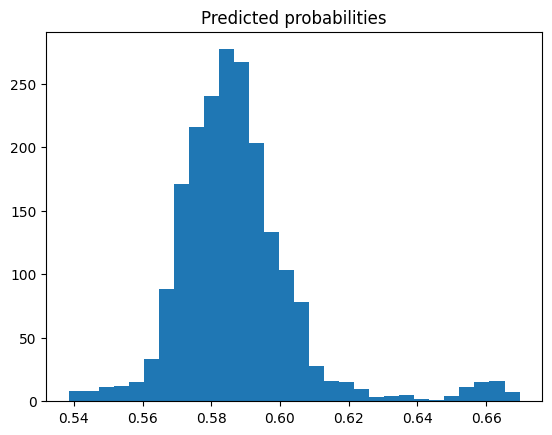

Best threshold (ROC Youden): 0.5907721
Best threshold (F1): 0.5385035
AUC: 0.5386423832577678
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       845
           1       0.58      1.00      0.73      1155

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.33      0.58      0.42      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score

y_prob = bst.predict(dvalid)

# 1) Inspect distribution
import matplotlib.pyplot as plt
plt.hist(y_prob, bins=30); plt.title("Predicted probabilities"); plt.show()

# 2) Find a better threshold (maximize F1 or Youden’s J)
fpr, tpr, thr = roc_curve(y_test, y_prob)
youden = tpr - fpr
best_thr_roc = thr[youden.argmax()]

prec, rec, thr_pr = precision_recall_curve(y_test, y_prob)
f1s = 2 * prec * rec / (prec + rec + 1e-9)
best_thr_f1 = thr_pr[f1s[:-1].argmax()]   # last element in thr_pr has no f1

print("Best threshold (ROC Youden):", best_thr_roc)
print("Best threshold (F1):", best_thr_f1)

y_pred_opt = (y_prob >= best_thr_f1).astype(int)
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_opt))

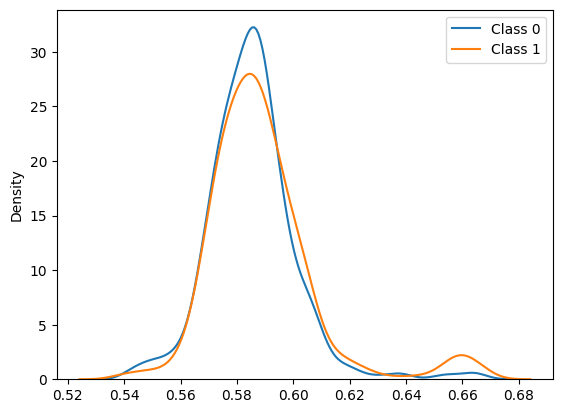

In [ ]:
import seaborn as sns
sns.kdeplot(y_prob[y_test==0], label='Class 0')
sns.kdeplot(y_prob[y_test==1], label='Class 1')
plt.legend(); plt.show()

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

CITIES = [
    ("New York, NY", 40.7128, -74.0060),
    ("Los Angeles, CA", 34.0522, -118.2437),
    ("Chicago, IL", 41.8781, -87.6298),
    ("Houston, TX", 29.7604, -95.3698),
    ("Atlanta, GA", 33.7490, -84.3880),
    ("Seattle, WA", 47.6062, -122.3321),
    ("Miami, FL", 25.7617, -80.1918),
    ("Denver, CO", 39.7392, -104.9903),
    ("Dallas, TX", 32.7767, -96.7970),
    ("Phoenix, AZ", 33.4484, -112.0740),
]

N = 10_000
vendors = [f"Vendor_{i}" for i in range(1, 101)]
chem_types = ["Acid", "Base", "Solvent", "Oxidizer", "Polymer"]
priority_levels = ["Low", "Medium", "High"]

def sample_city():
    name, lat, lon = CITIES[np.random.randint(len(CITIES))]
    return name, lat, lon

rows = []
for i in range(N):
    v = np.random.choice(vendors)
    cp = np.random.choice(chem_types, p=[0.25, 0.25, 0.3, 0.1, 0.1])
    pr = np.random.choice(priority_levels, p=[0.3, 0.5, 0.2])
    (oname, olat, olon) = sample_city()
    (dname, dlat, dlon) = sample_city()

    weight = np.abs(np.random.normal(500, 200)) + 10
    sched_days = np.random.randint(1, 15)
    cost = 200 + weight * np.random.uniform(0.5, 2.0)

    # True delay mechanism (make it learnable but not trivial)
    distance_km = 6371 * np.arccos(
        np.clip(
            np.sin(np.radians(olat))*np.sin(np.radians(dlat)) +
            np.cos(np.radians(olat))*np.cos(np.radians(dlat)) *
            np.cos(np.radians(olon - dlon)), -1, 1
        )
    )
    base_delay = 0.05 * (distance_km / 1000) + 0.01 * (weight / 1000)
    priority_factor = {"Low": 0.02, "Medium": -0.01, "High": -0.03}[pr]
    noise = np.random.normal(0, 0.05)

    prob_delay = np.clip(base_delay + priority_factor + noise, 0, 1)
    delay_flag = np.random.binomial(1, prob_delay)

    # actual_days (post-outcome, DO NOT USE AS FEATURE)
    actual_days = sched_days + np.random.randint(-1, 7) + delay_flag

    rows.append({
        "shipment_id": i+1,
        "vendor": v,
        "chemical_type": cp,
        "priority_level": pr,
        "origin_city": oname, "origin_lat": olat, "origin_lon": olon,
        "dest_city": dname, "dest_lat": dlat, "dest_lon": dlon,
        "shipment_weight": weight,
        "scheduled_days": sched_days,
        "shipment_cost": cost,
        "actual_days": actual_days,
        "delay_flag": delay_flag,
    })

df_geo = pd.DataFrame(rows)
df_geo.head()

,shipment_id,vendor,chemical_type,priority_level,origin_city,origin_lat,origin_lon,dest_city,dest_lat,dest_lon,shipment_weight,scheduled_days,shipment_cost,actual_days,delay_flag
0,1,Vendor_52,Polymer,Medium,"Atlanta, GA",33.7490,-84.3880,"Miami, FL",25.7617,-80.1918,326.634631,11,787.702005,17,0
1,2,Vendor_3,Acid,High,"Seattle, WA",47.6062,-122.3321,"Los Angeles, CA",34.0522,-118.2437,417.316461,12,791.537630,11,0
2,3,Vendor_49,Solvent,Medium,"Chicago, IL",41.8781,-87.6298,"Miami, FL",25.7617,-80.1918,505.108965,5,912.869009,10,0
3,4,Vendor_18,Polymer,High,"Los Angeles, CA",34.0522,-118.2437,"Phoenix, AZ",33.4484,-112.0740,389.872262,4,535.889846,6,0
4,5,Vendor_8,Acid,High,"Houston, TX",29.7604,-95.3698,"Los Angeles, CA",34.0522,-118.2437,256.976177,6,408.642169,9,0


In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    p = np.radians(lat2 - lat1) / 2
    q = np.radians(lon2 - lon1) / 2
    a = np.sin(p)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(q)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def add_geo_features(df):
    df = df.copy()
    df["distance_km"] = haversine(df["origin_lat"], df["origin_lon"], df["dest_lat"], df["dest_lon"])
    df["priority_score"] = df["priority_level"].map({"Low":1,"Medium":2,"High":3})
    df["buffer_ratio"] = df["scheduled_days"] / (df["distance_km"] + 1e-3)
    df["cost_per_kg"] = df["shipment_cost"] / np.maximum(df["shipment_weight"], 1)
    df["lane"] = df["origin_city"] + "_" + df["dest_city"]
    return df

In [ ]:
vendor_freq = train["vendor"].value_counts(normalize=True)
train["vendor_freq"] = train["vendor"].map(vendor_freq)
test["vendor_freq"]  = test["vendor"].map(vendor_freq).fillna(0)

NameError: name 'train' is not defined